# Installing llama.cpp on colab

In [ ]:
# Install ccache, a compiler cache tool, which helps to speed up the compilation process by caching previous compilations
!sudo apt-get install -y ccache  # -y flag automatically confirms the installation without prompting the user

# Check and display the installed version of ccache to verify the installation was successful
!ccache --version


In [ ]:
# Install the llama.cpp library
!git clone https://github.com/ggerganov/llama.cpp

# Move into the llama.cpp folder and build it. Use GGML_CUDA=1 for Linux environments
!cd llama.cpp && make -j 2  # -j flag for parallel build


# Inference with Quantized Model from Hugging Face Hub

This section discusses the inference process using the quantized model [**AnirudhJM24/Llama3-ChatQA-1.5-8B-Q4_K_M-GGUF**](https://huggingface.co/AnirudhJM24/Llama3-ChatQA-1.5-8B-Q4_K_M-GGUF), which represents a **Q4_K_M** quantization of the model [**nvidia/Llama3-ChatQA-1.5-8B**](https://huggingface.co/nvidia/Llama3-ChatQA-1.5-8B).

For a comprehensive overview of quantization and its various types, please refer to the following resource: [Quantization](https://huggingface.co/docs/optimum/en/concept_guides/quantization).

Replace the model files with your own models present on HuggingFace hub

In [ ]:
!pip install huggingface_hub
import os
from huggingface_hub import hf_hub_download



In [4]:
# Define the Hugging Face repository name for the model
hf_repo_name = "AnirudhJM24/Llama3-ChatQA-1.5-8B-Q4_K_M-GGUF"

# Define the filename of the model that you want to download from the repository
model_Q_4_K_M_file = "llama3-chatqa-1.5-8b-q4_k_m.gguf"

# Download the specified model file from the Hugging Face hub
# hf_hub_download is a function that retrieves files from the Hugging Face model hub
# Parameters:
# - hf_repo_name: The name of the repository where the model is stored
# - filename: The name of the specific model file to download
# - local_dir: The local directory where the downloaded file will be saved
# The local directory is set to 'quantized-model' inside the current working directory
hf_hub_download(
    hf_repo_name,
    filename=model_Q_4_K_M_file,
    local_dir=os.path.join(os.getcwd(), 'quantized-model')
)


/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


llama3-chatqa-1.5-8b-q4_k_m.gguf:   0%|          | 0.00/4.92G [00:00<?, ?B/s]

'/content/quantized-model/llama3-chatqa-1.5-8b-q4_k_m.gguf'

# Completion Mode

In [ ]:
# Start the llama-cli with the specified model file and a prompt for text generation

# /content/llama.cpp/llama-cli: Path to the llama-cli executable
# -m '/content/quantized-model/llama3-chatqa-1.5-8b-q4_k_m.gguf': Specifies the model file to be loaded for inference
# -p 'What is Insurance': Sets the input prompt that the model will respond to, asking for information about insurance
# -n 128: Specifies the maximum number of tokens (128) to be generated in the response
!/content/llama.cpp/llama-cli -m '/content/quantized-model/llama3-chatqa-1.5-8b-q4_k_m.gguf' -p 'What is Insurance' -n 128


#Output
# The basic function of insurance is to protect you against financial loss. An insurance policy is a contract between you and an insurance company. It spells out what you are covered for, what you are not covered for, and what the insurance company will do when you have a claim. The premium that you pay is the price of the insurance policy. [end of text]

# Conversation Mode

In [29]:
# Start the llama-cli with the specified model file and prompt

# /content/llama.cpp/llama-cli: Path to the llama-cli executable
# -m '/content/quantized-model/llama3-chatqa-1.5-8b-q4_k_m.gguf': Specifies the model file to be loaded for inference
# -p "You are a helpful assistant": Sets the initial prompt for the model, guiding its behavior in the conversation
# -cnv: Enables a specific mode or configuration; in this context, it could refer to a "conversation" mode for interactive dialogue

!/content/llama.cpp/llama-cli -m '/content/quantized-model/llama3-chatqa-1.5-8b-q4_k_m.gguf' -p "You are a helpful assistant" -cnv

''' Output: <|im_start|>system
You are a helpful assistant<|im_end|>

> what is up
not much, just chilling here
<|im_end|>'''

build: 3849 (8277a817) with cc (Ubuntu 11.4.0-1ubuntu1~22.04) 11.4.0 for x86_64-linux-gnu
main: llama backend init
main: load the model and apply lora adapter, if any
llama_model_loader: loaded meta data with 28 key-value pairs and 291 tensors from /content/quantized-model/llama3-chatqa-1.5-8b-q4_k_m.gguf (version GGUF V3 (latest))
llama_model_loader: Dumping metadata keys/values. Note: KV overrides do not apply in this output.
llama_model_loader: - kv   0:                       general.architecture str              = llama
llama_model_loader: - kv   1:                               general.type str              = model
llama_model_loader: - kv   2:                               general.name str              = Llama3 ChatQA 1.5 8B
llama_model_loader: - kv   3:                           general.basename str              = Llama3-ChatQA-1.5
llama_model_loader: - kv   4:                         general.size_label str              = 8B
llama_model_loader: - kv   5:                         

# Initializing a server

In [42]:
# Import the eval_js function from the google.colab.output module
from google.colab.output import eval_js

# Use the eval_js function to evaluate JavaScript code and return the proxy URL for a specific port (12345 in this case)
# google.colab.kernel.proxyPort is a JavaScript function that proxies the connection from the given port
# This can be useful when you want to expose local web applications running on a specific port (e.g., 12345) to the browser
print(eval_js("google.colab.kernel.proxyPort(12345)"))


https://ckkg16756kq-496ff2e9c6d22116-12345-colab.googleusercontent.com/


In [43]:
# Start the llama-server with the specified model file and configuration options

# /content/llama.cpp/llama-server: Path to the llama-server executable
# -m '/content/quantized-model/llama3-chatqa-1.5-8b-q4_k_m.gguf': Specifies the model file to be loaded for inference
# -ngl 9999: Sets the maximum number of generated tokens to 9999 (this controls the length of the generated output)
# -c 0: Configures the server with a specific option; in this case, it could mean using no specific context (0)
# --port 12345: Specifies the port number (12345) on which the server will listen for incoming connections
!/content/llama.cpp/llama-server -m '/content/quantized-model/llama3-chatqa-1.5-8b-q4_k_m.gguf' -ngl 9999 -c 0 --port 12345


build: 3849 (8277a817) with cc (Ubuntu 11.4.0-1ubuntu1~22.04) 11.4.0 for x86_64-linux-gnu
system info: n_threads = 1, n_threads_batch = 1, total_threads = 2

system_info: n_threads = 1 (n_threads_batch = 1) / 2 | AVX = 1 | AVX_VNNI = 0 | AVX2 = 1 | AVX512 = 1 | AVX512_VBMI = 0 | AVX512_VNNI = 0 | AVX512_BF16 = 0 | FMA = 1 | NEON = 0 | SVE = 0 | ARM_FMA = 0 | F16C = 1 | FP16_VA = 0 | RISCV_VECT = 0 | WASM_SIMD = 0 | BLAS = 0 | SSE3 = 1 | SSSE3 = 1 | VSX = 0 | MATMUL_INT8 = 0 | LLAMAFILE = 1 | 

main: HTTP server is listening, hostname: 127.0.0.1, port: 12345, http threads: 3
main: loading model
llama_model_loader: loaded meta data with 28 key-value pairs and 291 tensors from /content/quantized-model/llama3-chatqa-1.5-8b-q4_k_m.gguf (version GGUF V3 (latest))
llama_model_loader: Dumping metadata keys/values. Note: KV overrides do not apply in this output.
llama_model_loader: - kv   0:                       general.architecture str              = llama
llama_model_loader: - kv   1:       

## Web-Ui Example

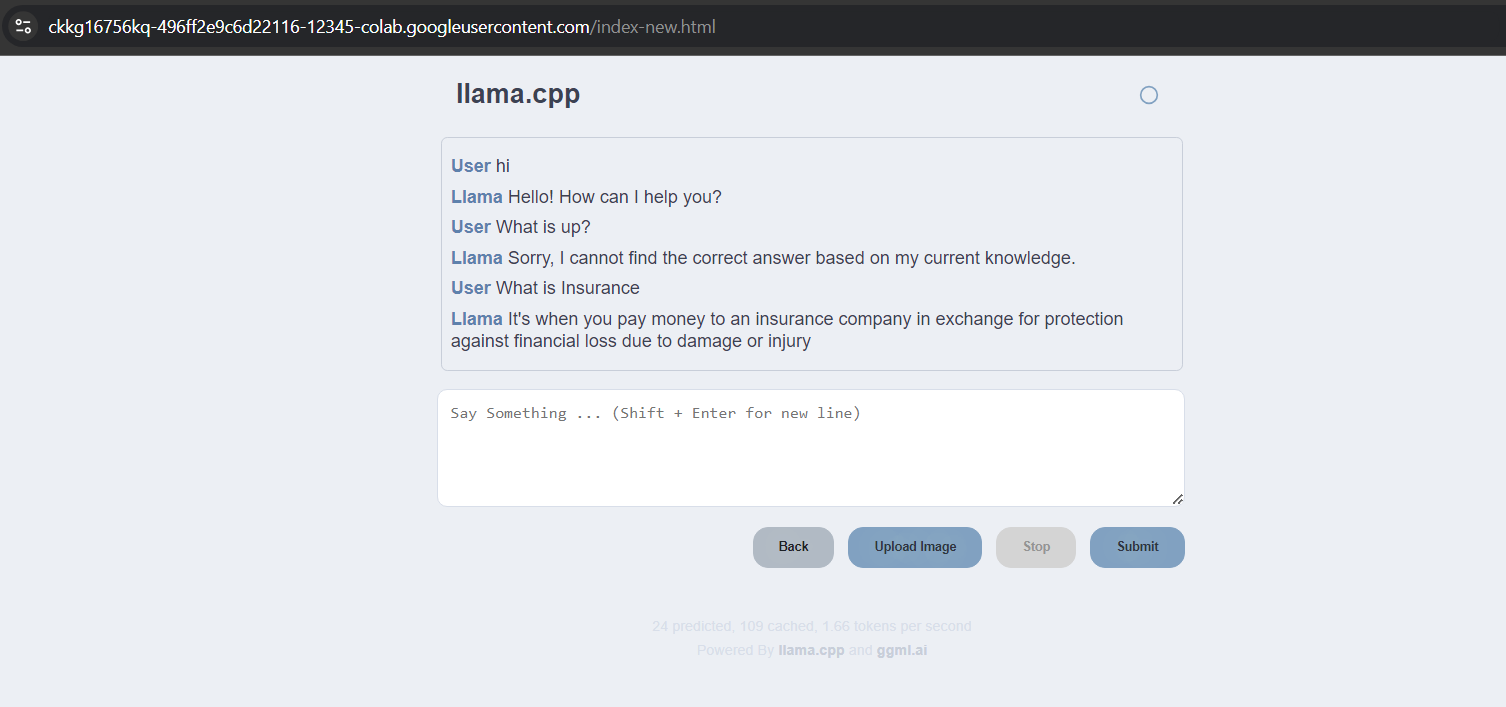